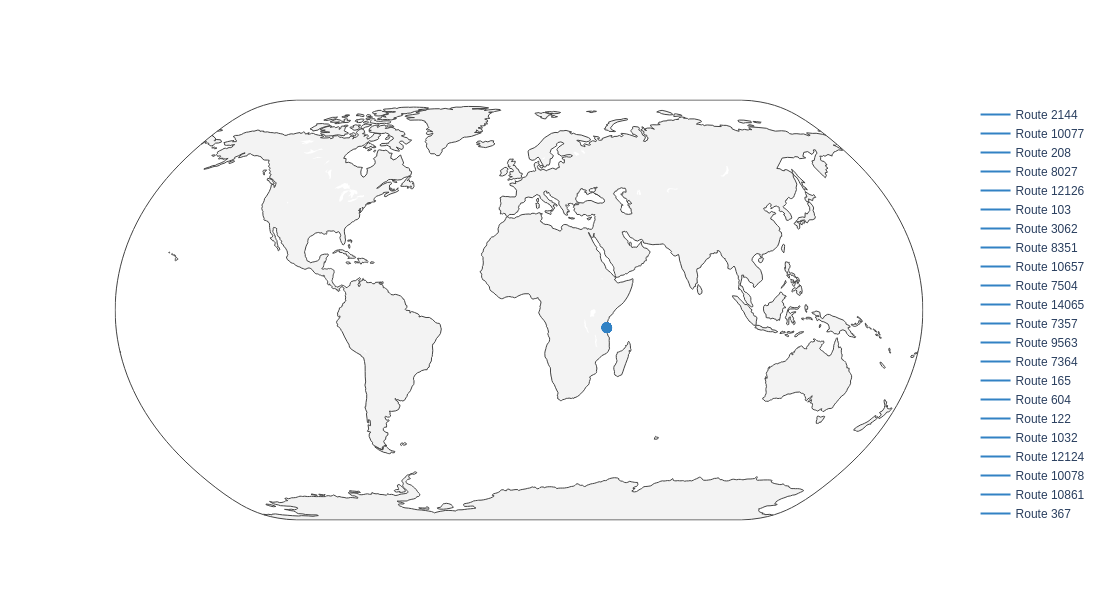

In [2]:
import geopandas as gpd
import plotly.graph_objects as go
import numpy as np
import json
import time

with open('bus_routes_unordered.geojson', 'r') as f:
    bus_routes = json.load(f)

gdf = gpd.GeoDataFrame.from_features(bus_routes['features'])

fig = go.Figure()

for _, row in gdf.iterrows():
    fig.add_trace(go.Scattergeo(
        lon=list(row['geometry'].coords.xy[0]),
        lat=list(row['geometry'].coords.xy[1]),
        mode='lines',
        line=dict(width=2, color='#3282c4'),
        name=f"Route {row['route_id']}"
    ))

bus_icons = ['img/minibus_orange.svg', 'img/minibus_green.svg']
for i, row in gdf.iterrows():
    fig.add_trace(go.Scattergeo(
        lon=[row['geometry'].coords.xy[0][0]],
        lat=[row['geometry'].coords.xy[1][0]],
        mode='markers',
        marker=dict(
            size=10,
            symbol='circle',  # Use available symbols
            color='#ff9433' if i < 15 else '#3282c4'
        ),
        text=f"Route {row['route_id']}",
        name=f"Bus {i}"
    ))

fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
    ),
    height=600,
    width=800
)

fig.show()